<a href="https://colab.research.google.com/github/HarshKubade/ML_Lab/blob/main/ML_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [6.7, 8.9, 9.0],
    [3.1, 5.6, 7.9],
    [1.2, 2.2, 3.2],
    [6.9, 8.9, 7.4],
    [6.8, 5.3, 1.7],
    [3.7, 5.5, 8.8],
    [2.2, 4.4, 5.5]
    ])
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,6.7,8.9,9.0
4,3.1,5.6,7.9
5,1.2,2.2,3.2
6,6.9,8.9,7.4
7,6.8,5.3,1.7
8,3.7,5.5,8.8
9,2.2,4.4,5.5


In [3]:
standardized_data = (df - df.mean()) / df.std()

In [4]:
cov_matrix = np.cov(standardized_data.T)

In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [6]:
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [7]:
eig_vecs_subset = eig_vecs[:, :2]

In [8]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])


In [9]:
print("\n Reduced Data (after PCA):\n", reduced_df)


 Reduced Data (after PCA):
         PC1       PC2
0  1.310983 -0.408005
1  2.310124 -0.021345
2  1.235008 -0.292007
3 -2.377878  0.009949
4 -0.604691  0.824059
5  1.351435  0.388785
6 -2.176799 -0.393714
7 -0.440906 -1.537095
8 -0.861498  0.857524
9  0.254222  0.571849


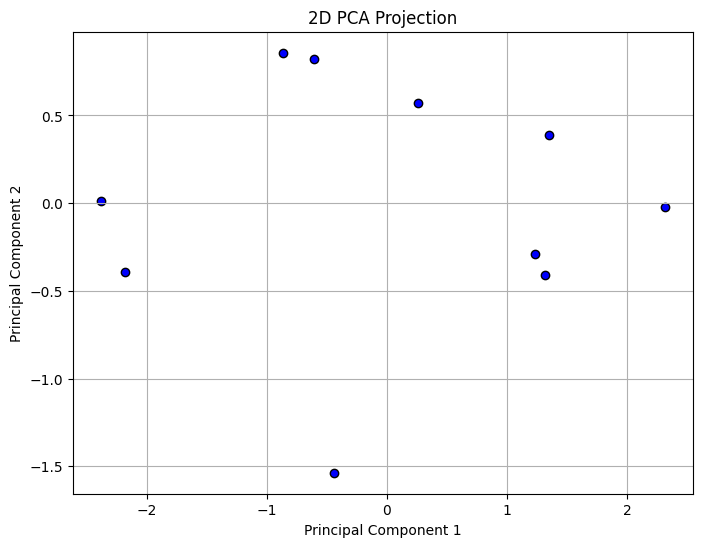

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()